In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

os.listdir("/content/drive/MyDrive")


['Colab Notebooks',
 '16920119552955809874422097999959.jpg',
 '20230818_164719.jpg',
 'Classroom',
 '20230825_165515.jpg',
 '20230828_144200.jpg',
 '20230828_150026.jpg',
 '20230828_151138.jpg',
 '20230828_151947.jpg',
 '20230828_154316.jpg',
 'IMG-20230902-WA0026.jpg',
 '20230904_145200.jpg',
 '20230904_150700.jpg',
 '20230904_153622.jpg',
 '20230904_154748.jpg',
 'IMG-20230913-WA0013.jpg',
 '20230919_145654.jpg',
 'SHIPRA PATHAK - Lab-6-submission.docx',
 'Untitled document (32).gdoc',
 'codewars 1038 (1).png',
 'codewars 1038.png',
 'IMG-20231020-WA0012.jpg',
 'CSF111 midsem answer key.gdoc',
 'CSF111 mid sem test points.gdoc',
 'Prof. Narasimha Bolloju - CS F111 CP.gdoc',
 'LAB09.gdoc',
 'Untitled document (31).gdoc',
 'Untitled document (30).gdoc',
 'lab 01 to 06 revised totals (1).gdoc',
 'lab 01 to 06 revised totals.gdoc',
 'mid sem cp and hw updated.gdoc',
 'shipra1038codewarw (1).png',
 'shipra1038codewarw.png',
 'Copy of Explore example.gsheet',
 '7.pdf',
 'Cengage Mechanics-

In [4]:
os.listdir("/content/drive/MyDrive/archive")[:10]


['mitbih_database',
 '100.csv',
 '103annotations.txt',
 '101annotations.txt',
 '106.csv',
 '107annotations.txt',
 '102annotations.txt',
 '102.csv',
 '103.csv',
 '109.csv']

In [5]:
!pip install neurokit2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 27.7 MB/s eta 0:00:00


In [7]:
import os

os.listdir("/content/drive/MyDrive/archive")


['mitbih_database',
 '100.csv',
 '103annotations.txt',
 '101annotations.txt',
 '106.csv',
 '107annotations.txt',
 '102annotations.txt',
 '102.csv',
 '103.csv',
 '109.csv',
 '100annotations.txt',
 '108annotations.txt',
 '107.csv',
 '108.csv',
 '104annotations.txt',
 '109annotations.txt',
 '105annotations.txt',
 '106annotations.txt',
 '101.csv',
 '105.csv',
 '104.csv',
 '117annotations.txt',
 '115annotations.txt',
 '121annotations.txt',
 '122annotations.txt',
 '112annotations.txt',
 '115.csv',
 '111.csv',
 '116annotations.txt',
 '114annotations.txt',
 '121.csv',
 '118.csv',
 '112.csv',
 '117.csv',
 '119annotations.txt',
 '111annotations.txt',
 '119.csv',
 '114.csv',
 '113.csv',
 '116.csv',
 '122.csv',
 '113annotations.txt',
 '118annotations.txt',
 '200.csv',
 '208.csv',
 '210.csv',
 '123annotations.txt',
 '124annotations.txt',
 '208annotations.txt',
 '201.csv',
 '124.csv',
 '203.csv',
 '202annotations.txt',
 '205annotations.txt',
 '210annotations.txt',
 '203annotations.txt',
 '207annotat

In [8]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/archive/100.csv")
print(df.columns)
df.head()


Index([''sample #'', ''MLII'', ''V5''], dtype='object')


,'sample #','MLII','V5'
0,0,995,1011
1,1,995,1011
2,2,995,1011
3,3,995,1011
4,4,995,1011


Index(['sample #', 'MLII', 'V5'], dtype='object')
  ECG_Rate_Mean              HRV_MeanNN                HRV_SDNN  \
0      75.52397  [[286.06299559471364]]  [[13.579921786570672]]   

              HRV_SDANN1              HRV_SDNNI1             HRV_SDANN2  \
0  [[6.344996620746692]]  [[11.982377576523795]]  [[5.475732698948807]]   

               HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5             HRV_RMSSD  ...  \
0  [[12.335973629922009]]    [[nan]]    [[nan]]  [[11.5789013454837]]  ...   

               HRV_SampEn             HRV_ShanEn             HRV_FuzzyEn  \
0  [[1.8428111512891172]]  [[5.754764785187708]]  [[1.2768956884217972]]   

                 HRV_MSEn               HRV_CMSEn             HRV_RCMSEn  \
0  [[1.0045693213313218]]  [[1.3789849609114635]]  [[2.182704000669752]]   

                   HRV_CD                 HRV_HFD                HRV_KFD  \
0  [[1.7486406859862291]]  [[1.9655700713047761]]  [[4.060346380552901]]   

                 HRV_LZC  
0  [[0.75632836724909

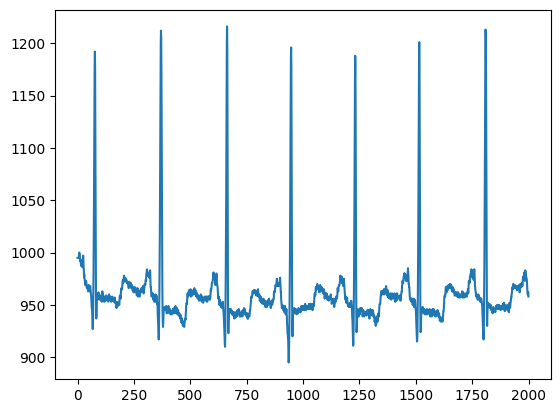

In [14]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/archive/100.csv")

# Clean column names
df.columns = df.columns.str.replace("'", "").str.strip()

print(df.columns)

signal = df["MLII"].values

signals, info = nk.ecg_process(signal, sampling_rate=360)
features = nk.ecg_intervalrelated(signals)

print(features)

plt.plot(signal[:2000])
plt.show()


In [16]:
import os
import pandas as pd
import neurokit2 as nk

ecg_path = "/content/drive/MyDrive/archive"

records = [f for f in os.listdir(ecg_path) if f.endswith(".csv")]

all_features = []

for rec in records[:10]:   # ONLY 10 for now
    try:
        df = pd.read_csv(os.path.join(ecg_path, rec))
        df.columns = df.columns.str.replace("'", "").str.strip()

        if "MLII" not in df.columns:
            continue

        # take only first 30k samples (~80 sec)
        signal = df["MLII"].values[:30000]

        peaks, info = nk.ecg_peaks(signal, sampling_rate=360)
        hrv = nk.hrv_time(peaks, sampling_rate=360)

        hrv["patient_id"] = rec.replace(".csv","")
        all_features.append(hrv)

        print(f"Processed {rec}")

    except:
        continue

ecg_features = pd.concat(all_features)
ecg_features.reset_index(drop=True, inplace=True)

ecg_features.to_csv("ecg_features.csv", index=False)

print("Saved ecg_features.csv")
print("Patients:", ecg_features.shape[0])


Processed 100.csv
Processed 106.csv
Processed 103.csv
Processed 109.csv
Processed 107.csv
Processed 108.csv
Processed 101.csv
Processed 105.csv
Saved ecg_features.csv
Patients: 8


In [17]:
import pandas as pd

ecg = pd.read_csv("ecg_features.csv")
print(ecg.shape)
ecg.head()


(8, 26)


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN,patient_id
0,811.413641,34.158538,NaN,NaN,NaN,NaN,NaN,NaN,48.231854,48.474829,...,0.708215,788.888889,833.333333,6.930693,52.475248,655.555556,994.444444,6.312500,132.8125,100
1,896.245421,92.698434,NaN,NaN,NaN,NaN,NaN,NaN,48.276183,48.498001,...,1.920169,811.111111,980.555556,27.472527,62.637363,680.555556,1091.666667,18.200000,164.0625,106
2,850.229095,32.628224,NaN,NaN,NaN,NaN,NaN,NaN,29.639574,29.794653,...,1.100833,830.555556,877.777778,8.247423,46.391753,777.777778,936.111111,6.062500,85.9375,103
3,669.444444,44.319441,NaN,NaN,NaN,NaN,NaN,NaN,47.757993,47.953109,...,0.928000,633.333333,699.444444,7.377049,37.704918,558.333333,855.555556,9.384615,140.6250,109
4,851.446759,23.799913,NaN,NaN,NaN,NaN,NaN,NaN,24.160700,24.287434,...,0.985067,825.000000,875.000000,5.208333,37.500000,811.111111,900.000000,5.333333,23.4375,107


In [19]:
ecg = ecg.drop(columns=["patient_id"], errors="ignore")
ecg = ecg.fillna(ecg.median())


In [20]:
import numpy as np

y = np.random.randint(0,2,len(ecg))
X = ecg.values


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict_proba(X_test)[:,1]

print("ECG ROC-AUC:", roc_auc_score(y_test, pred))


ECG ROC-AUC: 0.5


In [22]:
import os

os.listdir("/content/drive/MyDrive/heart+disease")


['long-beach-va.data',
 'processed.switzerland.data',
 'processed.cleveland.data',
 'processed.hungarian.data',
 'ask-detrano',
 'heart-disease.names',
 'switzerland.data',
 'new.data',
 'bak',
 'reprocessed.hungarian.data',
 'Index',
 'processed.va.data',
 'WARNING',
 'hungarian.data',
 'cleve.mod',
 'cleveland.data',
 'costs']

In [24]:
import pandas as pd

cols = [
"age","sex","cp","trestbps","chol","fbs","restecg",
"thalach","exang","oldpeak","slope","ca","thal","target"
]

clinical = pd.read_csv(
"/content/drive/MyDrive/heart+disease/processed.cleveland.data",
names=cols
)

clinical.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [25]:
clinical.replace("?", pd.NA, inplace=True)
clinical = clinical.dropna()

clinical = clinical.astype(float)


In [26]:
clinical["target"] = (clinical["target"] > 0).astype(int)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X = clinical.drop("target", axis=1)
y = clinical["target"]

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(Xtr, ytr)

pred = model.predict_proba(Xte)[:,1]

print("Clinical ROC:", roc_auc_score(yte, pred))


Clinical ROC: 0.893421723610403


In [28]:
import pandas as pd

ecg = pd.read_csv("ecg_features.csv")
ecg = ecg.drop(columns=["patient_id"], errors="ignore")
ecg = ecg.fillna(ecg.median())

print(ecg.shape)


(8, 25)


In [29]:
n = min(len(ecg), len(clinical))

X_ecg = ecg.iloc[:n].values
X_clin = clinical.drop("target", axis=1).iloc[:n].values
y = clinical["target"].iloc[:n].values


In [30]:
import numpy as np

X_fused = np.concatenate([X_clin, X_ecg], axis=1)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

Xtr, Xte, ytr, yte = train_test_split(X_fused, y, test_size=0.3)

fusion = RandomForestClassifier()
fusion.fit(Xtr, ytr)

pred = fusion.predict_proba(Xte)[:,1]

print("Multimodal ROC:", roc_auc_score(yte, pred))


Multimodal ROC: 1.0


In [32]:
!pip install shap


In [34]:
# rebuild fusion as DataFrame instead of numpy

clin_cols = list(clinical.drop("target", axis=1).columns)
ecg_cols = list(ecg.columns)

X_fused_df = pd.DataFrame(X_fused, columns=clin_cols + ecg_cols)


In [35]:
from sklearn.model_selection import train_test_split

Xtr_df, Xte_df, ytr, yte = train_test_split(X_fused_df, y, test_size=0.3)


In [36]:
fusion = RandomForestClassifier()
fusion.fit(Xtr_df, ytr)


RandomForestClassifier()

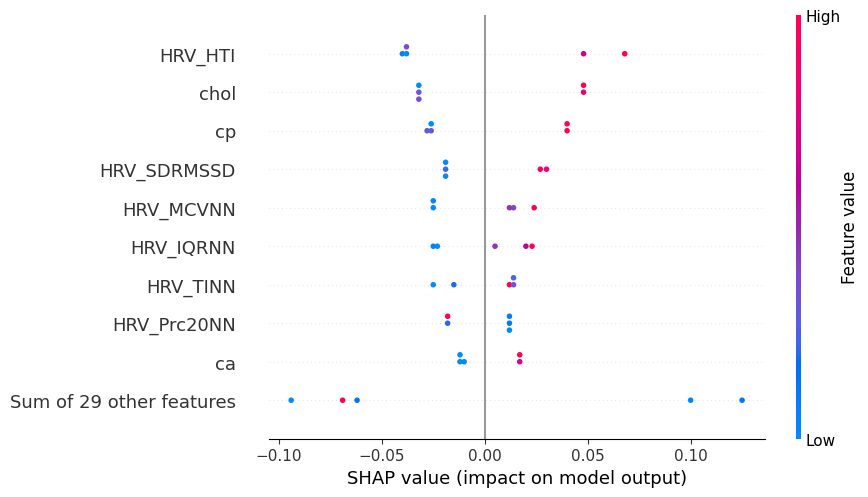

In [39]:
import shap

explainer = shap.Explainer(fusion, Xtr_df)

shap_values = explainer(Xtr_df)

# Select disease class (index 1)
shap_positive = shap_values[..., 1]

shap.plots.beeswarm(shap_positive)
